# Credit Card Fraud Detection

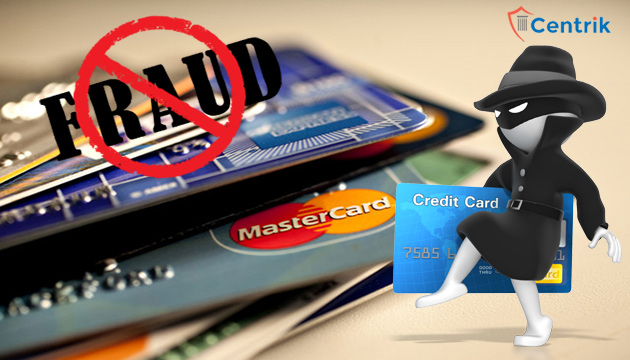

- **Project Overview**
- **Objective:** Develop a decision tree classifier for fraudulent credit card transactions.
Dataset: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## Data Importation and Statistics
- **Data Source:** import the credit card fraud dataset.
- **Initial Exploration:** Highlight key features and provide brief statistics.
- **Class Distribution:** Check for balance between fraudulent and non-fraudulent transactions.
- **Data Types and Missing Values:** Handle data types, missing values, and duplicates.
_____

- Import libreries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score



import Handler  
import pickle


import warnings
warnings.filterwarnings('ignore')  # to avoud warnings

- **Data Source:** import the credit card fraud dataset.

In [2]:
# Import dataset
df = pd.read_parquet("Dataset/creditcard.parquet")

# Save DataFrame to a Parquet file ( only for the firt import ) 
#df.to_parquet("Dataset/creditcard.parquet", index=False)

- Balancing Classes firts using hour custum function 

In [3]:
#Convert into dataFrame 

df = pd.DataFrame(df)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


- **Initial Exploration:** Highlight key features and provide brief statistics.


In [4]:
#shape 

df.shape

(284807, 31)

In [5]:
#columns 

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#Data types 

df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#Satistics : info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Statistics : describe

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Class Distribution: Check for balance between fraudulent and non-fraudulent transactions

In [10]:
#Class distribution 

print("Class distribution ;\n" , df['Class'].value_counts())


Class distribution ;
 Class
0    284315
1       492
Name: count, dtype: int64


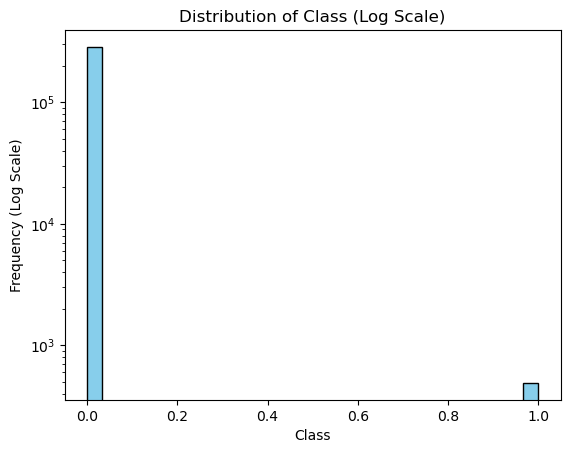

In [11]:
# Plot the class distribution 

plt.hist(df['Class'], bins=30, edgecolor='black', color='skyblue')
plt.yscale('log')  # Log scale for the y-axis
plt.title('Distribution of Class (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Frequency (Log Scale)')
plt.show()


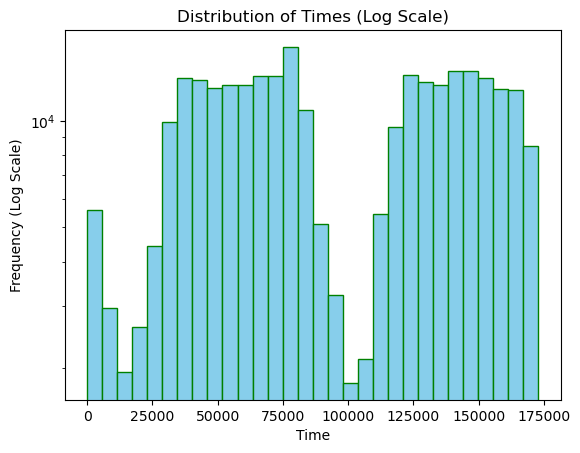

In [12]:
# Plot the Time distribution 

plt.hist(df['Time'], bins=30, edgecolor='green', color='skyblue')
plt.yscale('log')  # Log scale for the y-axis
plt.title('Distribution of Times (Log Scale)')
plt.xlabel('Time')
plt.ylabel('Frequency (Log Scale)')
plt.show()


- missing values

In [13]:
#Missing values 

print("Missing value :\n\n",df.isnull().sum())

Missing value :

 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


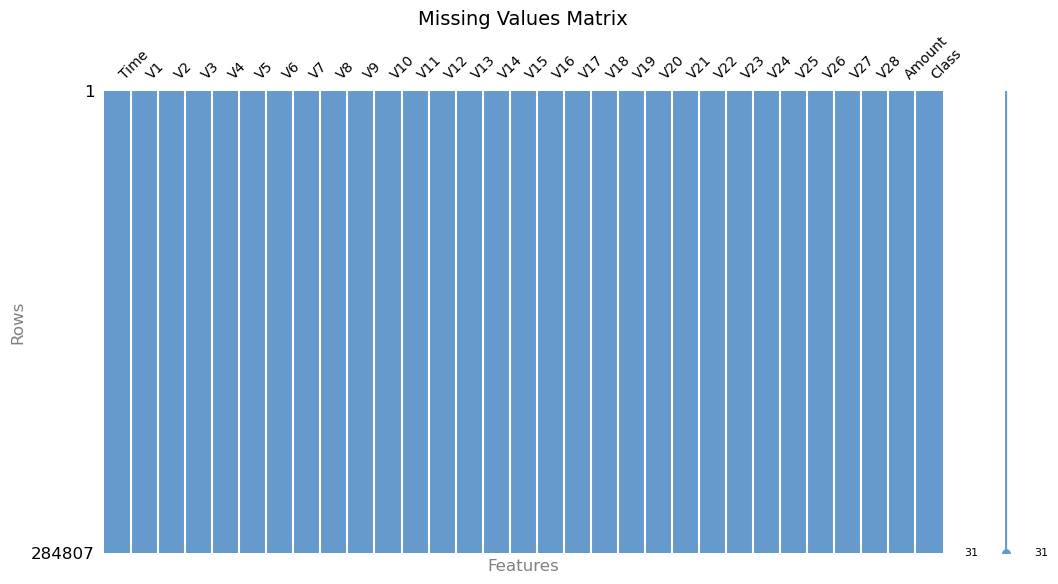

In [14]:
# Display missing values using a matrix

msno.matrix(df, fontsize=10, color=(0.4, 0.6, 0.8))

plt.xlabel("Features", fontsize=12, color='gray')
plt.ylabel("Rows", fontsize=12, color='gray')

plt.title("Missing Values Matrix", fontsize=14, color='black')
plt.gcf().set_size_inches(12, 6)
plt.show()

**NB:** Non missing values in dataset

In [15]:
#Check duplicates

df.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

In [16]:
#Drop duplicates

df = df.drop_duplicates()

## Exploring and Visualizing Data
- Transaction Analysis: Examine the distribution of transaction amounts.
- Feature Distributions: Compare features between genuine and fraudulent transactions.
- Correlation Analysis: Visualize feature relationships for fraud detection.
---------


- Transaction Analysis: Examine the distribution of transaction amounts.

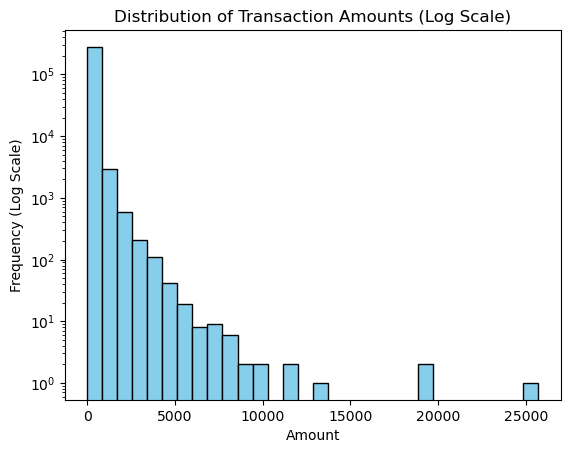

In [17]:
#  distribution of transaction amounts.

plt.hist(df['Amount'], bins=30, edgecolor='black', color='skyblue')
plt.yscale('log')  # Log scale for the y-axis
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency (Log Scale)')
plt.show()


- **Correlation Analysis:** Visualize feature relationships for fraud detection.

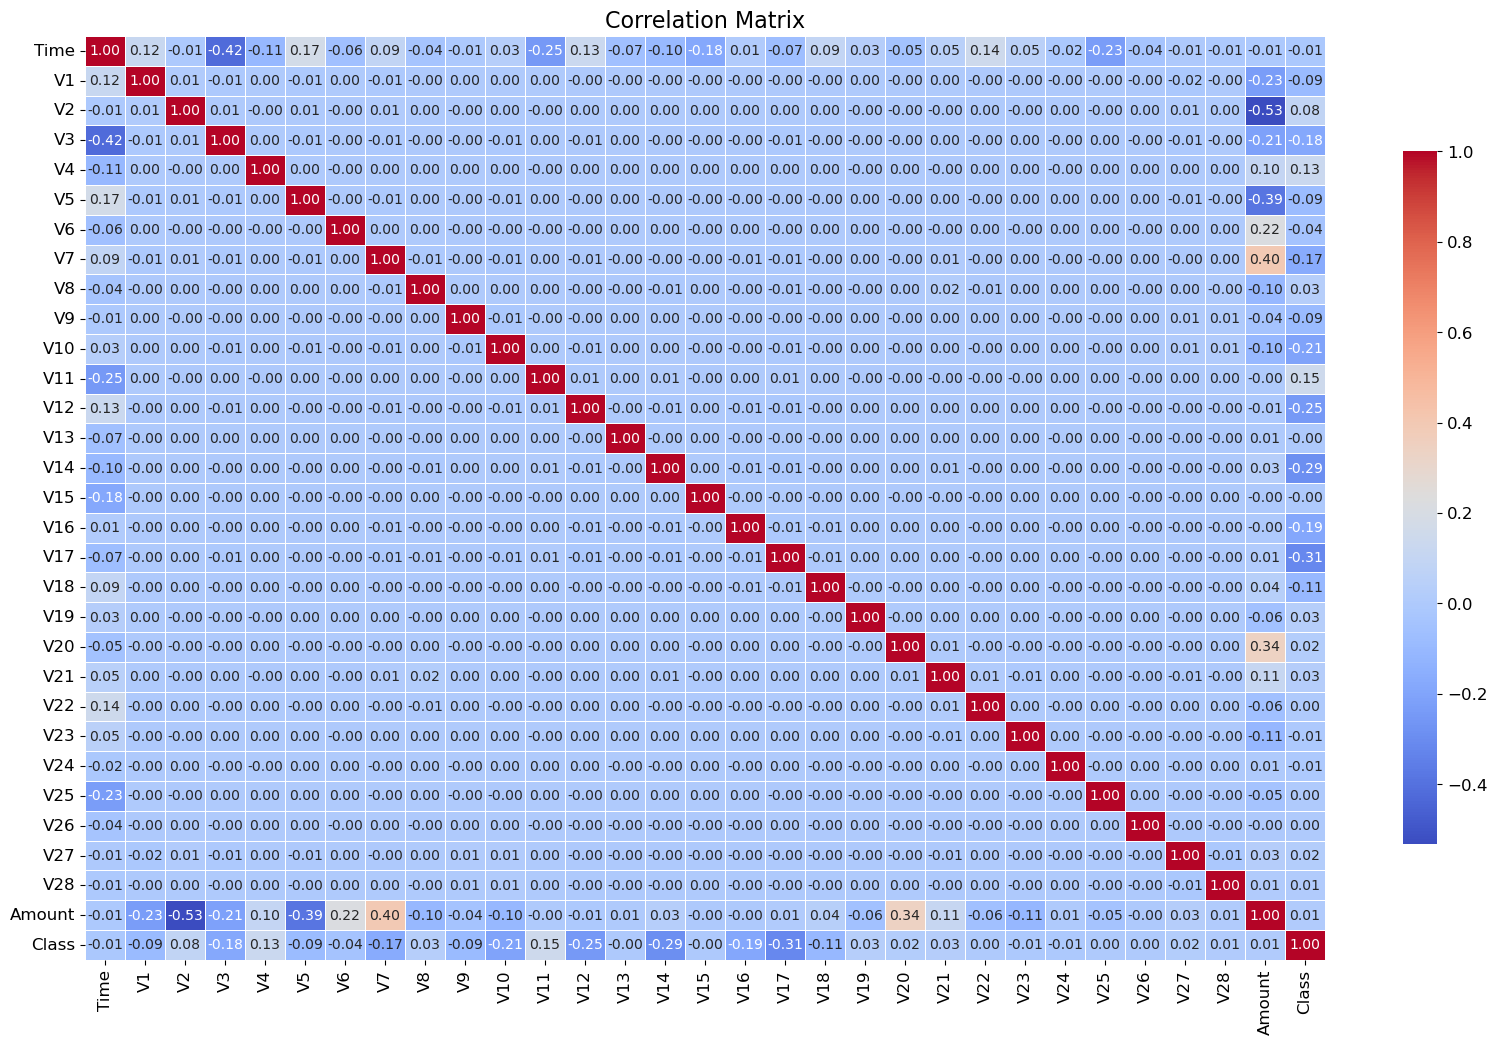

In [18]:
#plot the custum corr matrix 

Handler.custum_corr_matrix(df)

**This heatmap illustrates the correlation matrix of variables in the dataset.**

- The color intensity represents the strength and direction of correlation.
- Positive values **(closer to 1)** indicate positive correlation, while negative values **(closer to -1)** indicate negative correlation.
- The numbers in each cell show the correlation coefficient, with **1.00** being a perfect positive correlation and **-1.00** being a perfect negative correlation.
        

## Data Preprocessing
- Outlier Handling: Manage outlier transaction amounts.
- Feature Scaling: Normalize feature sizes for decision tree optimization.
- Handling Missing Values: Fill in missing data and assess its impact.
- Data Encoding: Convert words into numerical values for model input.
________

- Outlier Handling: Manage outlier transaction amounts

[Understanding and Implementing Z-Score for Anomaly Detection](https://detectoutliers.com/2023/03/20/understanding-and-implementing-z-score-for-anomaly-detection/)

In [19]:
#call of our handle_outliers function

#Handler.handle_outliers(df)

In [20]:
#Separe first features and target

X = df.drop('Class' ,axis=1)
y = df['Class']


- Feature Scaling: Normalize feature sizes for decision tree optimization.

In [21]:
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

**NB:** Since no categorical features have been detected in the dataset, we can proceed with applying feature scaling using **MinMaxScaler** to normalize all numerical features.

In [24]:
# Initialize the MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform 

df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [25]:
#Save sacaled df 

#Handler.save_dataset(df_scaled , "Dataset/Scaled/df_scaled.pkl")

In [26]:
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


## Model Building and Evaluation

- **Split Dataset:** into train and test 
- **Feature Importance Analysis:** Explain the method for determining feature importance.
- **Cross-Validation Strategies:** Employ cross-validation for robust model evaluation.
- **Evaluation Metrics:** Define metrics used to assess model performance.
- **Model Comparison:** Compare decision tree performance with other algorithms.
- **Validation Set Analysis:** Discuss the use of a validation set.
- **Hyperparameter Tuning:** Optimize decision tree performance through fine-tuning.
- **Ensemble Methods Comparison:** Evaluate the effectiveness of Random Forest.
- **Performance Trade-offs:** Address interpretability vs. accuracy trade-offs.
- **Confusion Matrix Analysis:** Analyze the confusion matrix for insights.

----------

- Split Dataset: into train and test

In [27]:
#Split 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Algorithm Selection:**  Justify the choice of the decision tree algorithm.

In [28]:
#Decision Tree classifier with class weight
classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')

- **Cross-Validation Strategies:** Employ cross-validation for robust model evaluation.

In [29]:
#cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


- **Evaluation Metrics:** Define metrics used to assess model performance.

In [30]:
# metric for cross-validation
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

In [ ]:
# Apply cross-validation in Train 
cv_results = cross_validate(classifier, X_train, y_train, cv=cv, scoring=scoring)

# Display the results
print("Precision: {:.2f}".format(np.mean(cv_results['test_precision'])*100 ), "%")
print("Recall: {:.2f}".format(np.mean(cv_results['test_recall'])*100 ), "%")
print("F1 Score: {:.2f}".format(np.mean(cv_results['test_f1_score'])*100 ), "%")

In [ ]:
# Apply cross-validation on the test set
cv_results = cross_validate(classifier, X_test, y_test, scoring=scoring)

# Display the results
print("Precision: {:.2f}".format(np.mean(cv_results['test_precision']) * 100), "%")
print("Recall: {:.2f}".format(np.mean(cv_results['test_recall']) * 100), "%")
print("F1 Score: {:.2f}".format(np.mean(cv_results['test_f1_score']) * 100), "%"  )